Predicted medals in 2028: 7.43
Predicted medals in 2032: 8.36
Predicted medals in 2036: 9.29


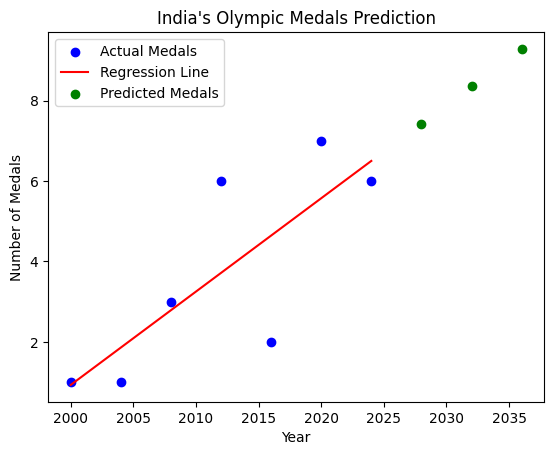

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Data: Years and corresponding total medals
data = {
    'Year': [2000, 2004, 2008, 2012, 2016, 2020, 2024],
    'Medals': [1, 1, 3, 6, 2, 7, 6]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Prepare the data for modeling
X = df['Year'].values.reshape(-1, 1)
y = df['Medals'].values

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict medals for the years 2025, 2026, and 2027
future_years = np.array([2028, 2032, 2036]).reshape(-1, 1)
predicted_medals = model.predict(future_years)

# Output the predictions
for year, medals in zip(future_years.flatten(), predicted_medals):
    print(f"Predicted medals in {year}: {medals:.2f}")

# Optional: Visualize the data and the regression line
plt.scatter(X, y, color='blue', label='Actual Medals')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.scatter(future_years, predicted_medals, color='green', label='Predicted Medals')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.title('India\'s Olympic Medals Prediction')
plt.legend()
plt.show()


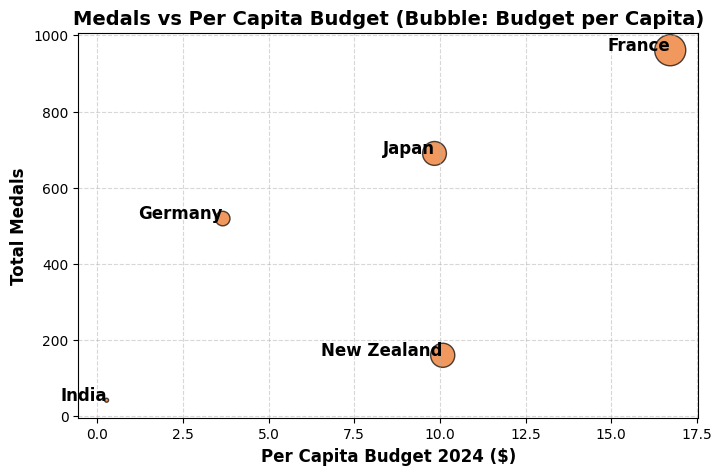

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data
countries = ["France", "India", "Japan", "New Zealand", "Germany"]
medals = [281 + 320 + 360, 10 + 10 + 22, 690, 160, 519]  # Total Medals
per_capita_budget = [16.72, 0.27, 9.84, 10.08, 3.66]  # Budget per capita in $

# Bubble size scaled by per capita budget
bubble_size = np.array(per_capita_budget) * 30  # Adjust size for better visibility

# Background color from table
bg_color = "#ffffff"
bar_color = "#eb6d1a"

# Create Bubble Chart
plt.figure(figsize=(8, 5), facecolor=bg_color)
# plt.gca().set_facecolor(bg_color)
plt.scatter(per_capita_budget, medals, s=bubble_size, alpha=0.7, c=bar_color, edgecolors="black")

# Labels and Title
for i, country in enumerate(countries):
    plt.text(per_capita_budget[i], medals[i], country, fontsize=12, ha='right', color='black', weight='bold')
plt.xlabel("Per Capita Budget 2024 ($)", fontsize=12, weight='bold', color='black')
plt.ylabel("Total Medals", fontsize=12, weight='bold', color='black')
plt.title("Medals vs Per Capita Budget (Bubble: Budget per Capita)", fontsize=14, weight='bold', color='black')
plt.grid(True, linestyle='--', alpha=0.5)

# Show Chart
plt.show()


In [1]:
import pandas as pd
import re

# Define the path to the text file
file_path = "/home/dgxuser16/NTL/mccarthy/ahmad/github/adaptive_privacy_fl/old_codes/without_dp/isic/version_03/client_1/log_file.txt"  # Change this to the actual file path

# Initialize lists to store extracted data
epochs = []
accuracies = []
aucs = []
losses = []

# Open and read the file line by line
with open(file_path, "r") as file:
    for line in file:
        # Extract Global Epoch
        epoch_match = re.search(r"Global Epoch \(Round\): (\d+)", line)
        if epoch_match:
            current_epoch = int(epoch_match.group(1))  # Store the latest epoch
        
        # Extract Loss, Accuracy, and AUC
        loss_match = re.search(r"Loss: ([\d\.]+), Accuracy: ([\d\.]+), AUC: ([\d\.]+)", line)
        if loss_match:
            loss = float(loss_match.group(1))
            accuracy = float(loss_match.group(2))
            auc = float(loss_match.group(3))
            
            # Append extracted data to lists
            epochs.append(current_epoch)
            losses.append(loss)
            accuracies.append(accuracy)
            aucs.append(auc)

# Create a DataFrame
df = pd.DataFrame({
    "Epoch": epochs,
    "Accuracy": accuracies,
    "AUC": aucs,
    "Loss": losses
})

# Save to an Excel file
excel_filename = "training_results.xlsx"
df.to_excel(excel_filename, index=False)

print(f"Data successfully extracted and saved to {excel_filename}")


NameError: name 'current_epoch' is not defined

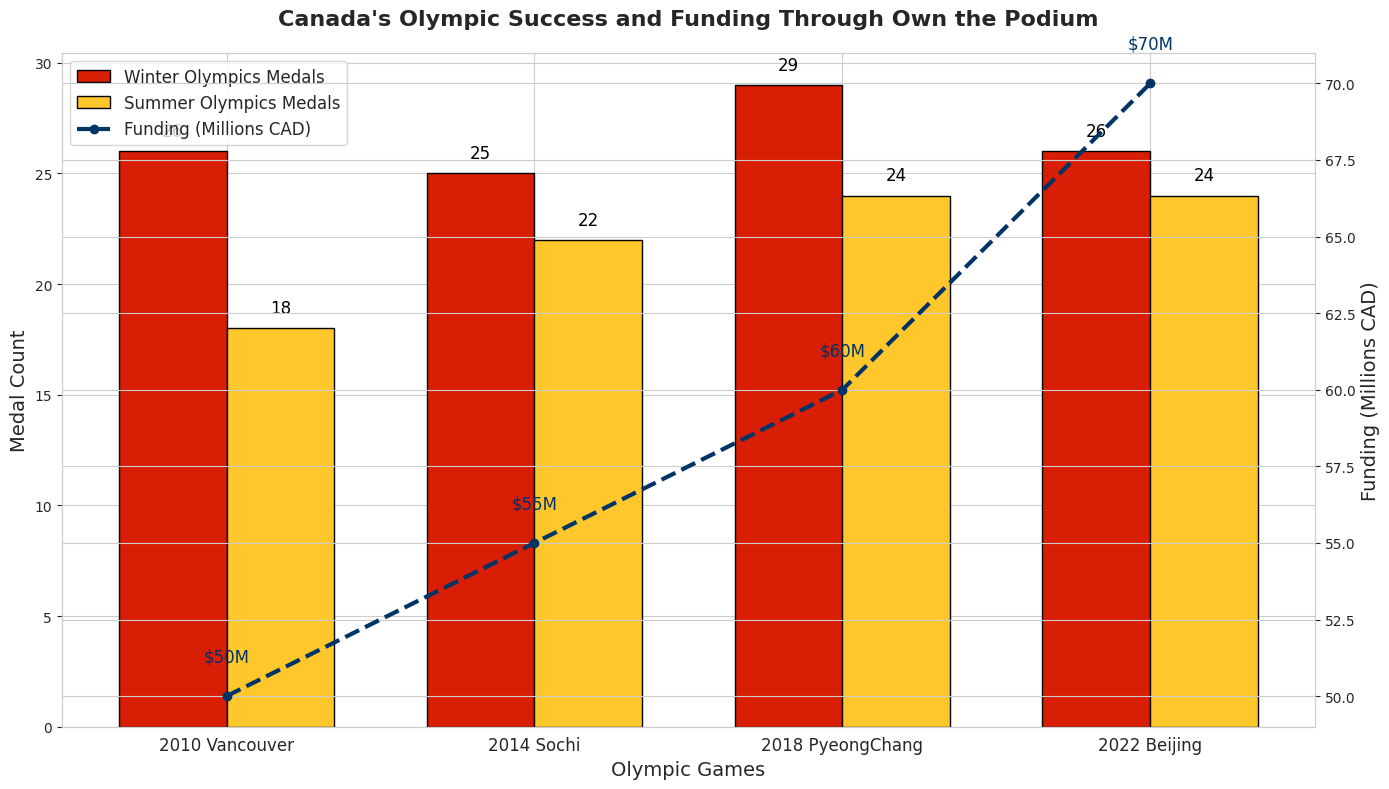

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ----- DATA & STYLE -----
years = ['2010 Vancouver', '2014 Sochi', '2018 PyeongChang', '2022 Beijing']
medals_winter = [26, 25, 29, 26]  # Winter Olympics medal counts
medals_summer = [18, 22, 24, 24]  # Summer Olympics medal counts
funding = [50, 55, 60, 70]        # Funding in millions of CAD

sns.set_style("whitegrid")
fig, ax1 = plt.subplots(figsize=(14, 8))

# ----- BAR CHART (ax1) -----
bar_width = 0.35
x = np.arange(len(years))

bars_winter = ax1.bar(x - bar_width/2,
                      medals_winter,
                      width=bar_width,
                      label='Winter Olympics Medals',
                      color='#D81E05',
                      edgecolor='black',
                      zorder=2)  # zorder to ensure bars are beneath text

bars_summer = ax1.bar(x + bar_width/2,
                      medals_summer,
                      width=bar_width,
                      label='Summer Olympics Medals',
                      color='#FFC72C',
                      edgecolor='black',
                      zorder=2)

ax1.set_xticks(x)
ax1.set_xticklabels(years, fontsize=12)
ax1.set_xlabel('Olympic Games', fontsize=14)
ax1.set_ylabel('Medal Count', fontsize=14)

# ----- SECONDARY AXIS FOR FUNDING (ax2) -----
ax2 = ax1.twinx()
line_funding, = ax2.plot(x,
                         funding,
                         marker='o',
                         linestyle='--',
                         color='#003366',
                         label='Funding (Millions CAD)',
                         linewidth=3,
                         zorder=3)

ax2.set_ylabel('Funding (Millions CAD)', fontsize=14)

# ----- TITLE -----
plt.title("Canada's Olympic Success and Funding Through Own the Podium",
          fontsize=16, fontweight='bold', pad=20)

# ----- ANNOTATIONS FOR MEDALS (on ax1) -----
for i, (w, s) in enumerate(zip(medals_winter, medals_summer)):
    # Winter medals above red bar
    ax1.text(i - bar_width/2,
             w + 0.5,
             str(w),
             ha='center',
             va='bottom',
             fontsize=12,
             color='black',
             zorder=5)
    
    # Summer medals above yellow bar
    ax1.text(i + bar_width/2,
             s + 0.5,
             str(s),
             ha='center',
             va='bottom',
             fontsize=12,
             color='black',
             zorder=5)

# ----- ANNOTATIONS FOR FUNDING (on ax2) -----
for i, f in enumerate(funding):
    ax2.text(i,
             f + 1,
             f"${f}M",
             ha='center',
             va='bottom',
             fontsize=12,
             color='#003366',
             zorder=5)

# ----- LEGEND (combine handles from both axes) -----
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper left', fontsize=12)

plt.tight_layout()
plt.show()


In [2]:
import numpy as np

import matplotlib.pyplot as plt
# Mock coordinates (India-like distribution)
np.random.seed(42)
x = np.random.normal(75, 10, 50)
y = np.random.normal(22, 5, 50)

plt.figure(figsize=(5, 5))
plt.scatter(x, y, color='blue', s=30, alpha=0.6)
plt.title("Proposed Rural Training Hubs (2030)", fontsize=10)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(linestyle='--', alpha=0.5)
plt.savefig('rural_hubs.png', dpi=300, bbox_inches='tight')
plt.close()